# 'River meanders and the theory of minimum variance' 
# and 'Up a lazy river'

The issue is not how the channel guides the river but how the river carves the channel. Rivers meander even when they carry no sediment, and even when they have no banks (Hayes, 2006)!

### Reference
- Von Schelling, H. (1951). Most frequent particle paths in a plane. Eos, Transactions American Geophysical Union, 32(2), 222-226.
- Von Schelling, H. (1964). Most frequent random walks. Schenectady, N.Y.: General Electric
- Leopold, L. B., & Langbein, W. B. (1966). River meanders. Scientific American, 214(6), 60-73.
- Langbein, W. B., & Leopold, L. B. (1970). River meanders and the theory of minimum variance. In Rivers and river terraces (pp. 238-263). Palgrave Macmillan, London.
- Hayes, B. (2006). Computing science: Up a lazy river. American Scientist, 94(6), 490-494.

### Researcher
- Hermann von Schelling
- [Walter B. Langbein](http://www.nasonline.org/member-directory/deceased-members/53482.html) (1907-1982, Geomorphologist and Hydrologist)
- [Luna Bergere Leopold](https://en.wikipedia.org/wiki/Luna_Leopold) (1915-2006, Geomorphologist and Hydrologist) [The Virtual Luna Leopold Project](https://eps.berkeley.edu/people/lunaleopold/)
- [Brian Hayes](https://en.wikipedia.org/wiki/Brian_Hayes_(scientist)) (Scientist, columnist and author)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Theoretical meander in plan view

It has been suggested that meanders are caused by such processes as (Langbein&Leopold, 1970):
- regular erosion and deposition; 
- secondary circulation in the cross-sectional plane; 
- seiche effect analogous to lake seiches.

The planimetric geometry of a meander is that of a random walk whose most frequent form minimizes the sum of the squares of the changes in direction in each successive unit length. The direction angles are then sine functions of channel distance. **The sine-generated curve** has been defined as follows:

$\phi =\omega sin(\frac{s}{M}2\pi$)

Where $\phi$ equals the direction at location s, $M$ is the total path distance along a meander, and $\omega$ is the maximum angle the path makes from the mean downvalley direction.

Among all the ways of bending and folding this segment from $a$ to $b$ with length $M$, **the sine-generated curve** has three properties:
- It is the path of minimal **bending stress** (The bending stress of a river is the work or energy that has to be expend ed to make its path deviate from a straight line. At each point along the route, the bending stress is proportional to the square of the curvature at that point.),
- it is the path of minimal **variance in direction**,
- and it is the path representing the most likely **random walk**.

Since theory and observation indicate meanders achieve the minimum variance postulated, it follows that for channels in which alternating pools and riffles occur, meandering is the most probable form of channel geometry and thus is more stable geometry than a straight or non-meandering alignment.

In [100]:
# omega = 2.2/3.14*180
omega = 110    # [degree], maximum angle a path makes with mean downpath direction
x0, y0 = 0.,0. # the coordinate of the beginning point
M = 100        # fixed total distance along path 
N = 150        # the number of the unit distance along path
s = np.linspace(M*-0.25,M*1.25,N) # the unit distance along path

In [101]:
# Sine-generated curve defined by omega and path distance
phi = omega*np.sin(s/M*2*np.pi)

# Coordinates (x,y) of a point of the river path from (Von Schelling, 1951)
x = np.zeros_like(s)
y = np.zeros_like(s)
x[0],y[0]= x0,y0
for i in range(1,len(s)):
    ds = s[i]-s[i-1]
    dx = ds*np.cos(phi[i-1]/180*np.pi) 
    dy = ds*np.sin(phi[i-1]/180*np.pi)
    x[i] = x[i-1]+dx 
    y[i] = y[i-1]+dy

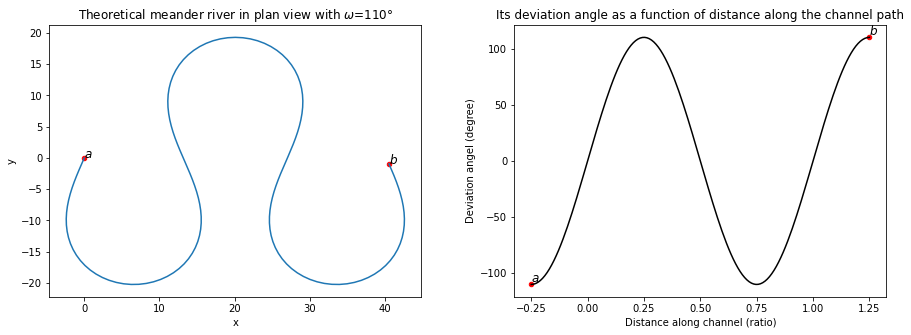

In [102]:
# Fig.2 in (Langbein&Leopold, 1970)
fig = plt.figure(figsize=(15,5))
ax = fig.subplots(1,2)

ax[0].set(xlabel='x', ylabel='y')
ax[0].set_title('Theoretical meander river in plan view with $\omega$=%s$\degree$'%omega)
ax[0].plot(x,y)

ax[0].scatter(x[0], y[0],color='r',s=20)
ax[0].text(x[0], y[0], '$a$', fontsize=12)
ax[0].scatter(x[-1], y[-1],color='r',s=20)
ax[0].text(x[-1], y[-1], '$b$', fontsize=12)

ax[1].set(xlabel='Distance along channel (ratio)', ylabel='Deviation angel (degree)')
ax[1].set_title('Its deviation angle as a function of distance along the channel path')
ax[1].set(xticks=np.arange(-0.25,1.25+0.1,0.25))
ax[1].plot(s/M,phi,'k')

ax[1].scatter(s[0]/M,phi[0],color='r',s=20)
ax[1].text(s[0]/M,phi[0]+2, '$a$', fontsize=12)
ax[1].scatter(s[-1]/M,phi[-1],color='r',s=20)
ax[1].text(s[-1]/M,phi[-1]+2, '$b$', fontsize=12)

plt.subplots_adjust(wspace =0.25, hspace =0)

#fname_save = 'Theoretical meander river with w='+str(omega)+'degree.png'
#plt.savefig(fname_save,dpi=300)

### Sinuosity

The sinuosity, $k$, equals the average of the values of $cos\phi$ over the range from $\phi=0$ to $\phi=\omega$. Thus a relationship can be defined between k and $\omega$. An approximate algebraic expression is: $\omega (radians) = 2.2\sqrt{\frac{k-1}{k}}$, or: $\omega = 125^{\circ}\sqrt{\frac{k-1}{k}}$

In [97]:
#k = 4.84/(4.84-(omega/180*np.pi)**2)
k = 1/(1-(omega/125)**2)
print('k is %s'%k)

k is 2.7777777777777786


### Azimuth 

In [98]:
 azi = np.zeros_like(phi)
for i in range(0,len(phi)):
    azi[i] = float((-phi[i] + 90.0) % 360.0)

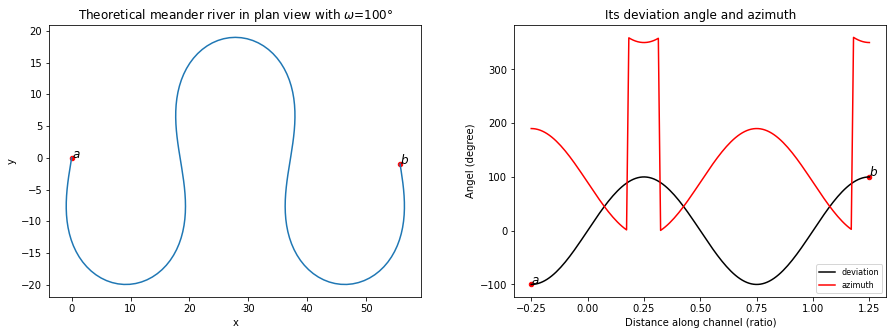

In [99]:
# Fig.2 in (Langbein&Leopold, 1970)
fig = plt.figure(figsize=(15,5))
ax = fig.subplots(1,2)

ax[0].set(xlabel='x', ylabel='y')
ax[0].set_title('Theoretical meander river in plan view with $\omega$=%s$\degree$'%omega)
ax[0].plot(x,y)

ax[0].scatter(x[0], y[0],color='r',s=20)
ax[0].text(x[0], y[0], '$a$', fontsize=12)
ax[0].scatter(x[-1], y[-1],color='r',s=20)
ax[0].text(x[-1], y[-1], '$b$', fontsize=12)

ax[1].set(xlabel='Distance along channel (ratio)', ylabel='Angle (degree)')
ax[1].set_title('Its deviation angle and azimuth')
ax[1].set(xticks=np.arange(-0.25,1.25+0.1,0.25))
ax[1].plot(s/M,phi,'k',label='deviation')
ax[1].plot(s/M,azi,'r',label='azimuth')

ax[1].scatter(s[0]/M,phi[0],color='r',s=20)
ax[1].text(s[0]/M,phi[0]+2, '$a$', fontsize=12)
ax[1].scatter(s[-1]/M,phi[-1],color='r',s=20)
ax[1].text(s[-1]/M,phi[-1]+2, '$b$', fontsize=12)

plt.legend(loc = 'lower right',prop = {'size':8}) 

plt.subplots_adjust(wspace =0.25, hspace =0)

fname_save = 'Theoretical meander river with w='+str(omega)+'degree_azimuth.png'
plt.savefig(fname_save,dpi=300)

In [91]:
# fig = plt.figure(figsize=(7,5))
# ax = plt.subplot(111)

# ax.set(xlabel='x', ylabel='y')
# ax.set_title('Theoretical meander river in plan view with $\omega$=%s$\degree$'%omega)
# ax.plot(x,y)

# ax.scatter(x[0], y[0],color='r',s=20)
# ax.text(x[0], y[0], '$a$', fontsize=12)
# ax.scatter(x[-1], y[-1],color='r',s=20)
# ax.text(x[-1], y[-1], '$b$', fontsize=12)


# ax2 = ax.twinx() 
# ax2.plot(x,azi,color='red',label='Azimuth_neighbor point')
# # ax2.plot(x,azi2,color ='blue',label='Azimuth_gradeint')
# # ax2.plot(x,azi3,color ='yellow',label='Azimuth_gradeint topopy')
# ax2.set_ylabel('Azimuth')

# plt.legend(loc = 'lower right',prop = {'size':8}) 

In [92]:
from qixiang import functions as fnqx

In [93]:
river_xy = np.array((x, y)).T 
azi_np = fnqx.cal_azi_river(river_xy) # neighbor points

In [58]:
# dx = np.gradient(x)
# dy = np.gradient(y)
# azi_gra = np.zeros(len(dx))
# for i in range(0,len(dx)):
#     azi_gra[i] = fnqx.cal_azi(0,0,dx[i],dy[i])

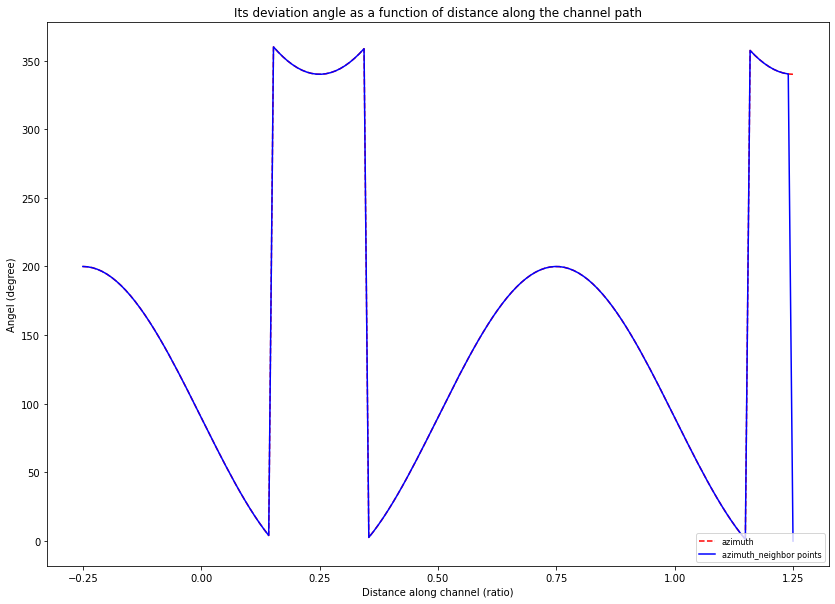

In [60]:
fig = plt.figure(figsize=(14,10))
ax = plt.subplot(111)

ax.set(xlabel='Distance along channel (ratio)', ylabel='Angel (degree)')
ax.set_title('Its deviation angle as a function of distance along the channel path')
ax.set(xticks=np.arange(-0.25,1.25+0.1,0.25))
#ax.plot(s/M,phi,'k',label='deviation')
ax.plot(s/M,azi,'r--',label='azimuth')
ax.plot(s/M,azi_np,'b',label='azimuth_neighbor points')
#ax.plot(s/M,azi2,'y',label='gradient')

# ax.scatter(s[0]/M,phi[0],color='r',s=20)
# ax.text(s[0]/M,phi[0]+2, '$a$', fontsize=12)
# ax.scatter(s[-1]/M,phi[-1],color='r',s=20)
# ax.text(s[-1]/M,phi[-1]+2, '$b$', fontsize=12)

plt.legend(loc = 'lower right',prop = {'size':8}) 

In [62]:
(azi[:-2]-azi_np[:-2]).max()

1.7053025658242404e-13

In [63]:
azi.mean()

162.0

### Characteristic scale

**The river can't think globally; it can only act locally.** What are the forces at each point along the river channel that create and maintain that shape (Hayes, 2016)?